In [459]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [460]:
iris_df= pd.read_csv("iris.csv")
print(iris_df.sample(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
28    29            5.2           3.4            1.4           0.2   
22    23            4.6           3.6            1.0           0.2   
89    90            5.5           2.5            4.0           1.3   
1      2            4.9           3.0            1.4           0.2   
46    47            5.1           3.8            1.6           0.2   
43    44            5.0           3.5            1.6           0.6   
119  120            6.0           2.2            5.0           1.5   
149  150            5.9           3.0            5.1           1.8   
57    58            4.9           2.4            3.3           1.0   
146  147            6.3           2.5            5.0           1.9   

             Species  
28       Iris-setosa  
22       Iris-setosa  
89   Iris-versicolor  
1        Iris-setosa  
46       Iris-setosa  
43       Iris-setosa  
119   Iris-virginica  
149   Iris-virginica  
57   Iris-versicolor  

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [461]:
print(iris_df.isna().any())
print(iris_df.isna().sum())

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool
Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


In [462]:
iris_df[iris_df.isna().values]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [463]:
iris_df.fillna(value=iris_df.median(),inplace=True)

In [464]:
iris_df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [465]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [466]:
iris_df['Species']= iris_df['Species'].astype('category')

In [467]:
iris_df['Species'] = iris_df['Species'].cat.codes

In [468]:
iris_df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [469]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int8
dtypes: float64(4), int64(1), int8(1)
memory usage: 6.2 KB


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [470]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


With target variable every independent variables have greater correlation then mentioned values

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [471]:
iris_df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

A variable with 0 variance is a constant. SepalWidthcm has variance of 0.18 , very less variance, so dropping that column

In [472]:
iris_df.drop(columns='SepalWidthCm', inplace=True)

In [473]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

## Question 6

*Plot the scatter matrix for all the variables.*

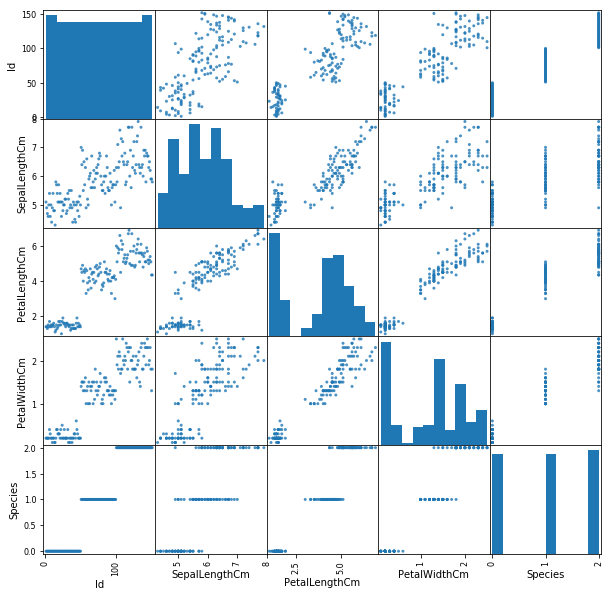

In [474]:
pd.plotting.scatter_matrix(iris_df, alpha=0.8, figsize=(10,10));

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [475]:
X= iris_df.drop('Species', axis=1)
Y= iris_df.pop('Species')

In [476]:

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.20)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [477]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(pred, y_test))

1.0


In [478]:
k_values=[3,5,9]

In [479]:
for i in k_values:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    print("for k {a} accuracy is {b}".format(a=i,b=accuracy_score(pred, y_test)))

for k 3 accuracy is 1.0
for k 5 accuracy is 1.0
for k 9 accuracy is 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [480]:
n_list= list(range(0,20))
print(n_list)
neighbors= list(filter(lambda x: x % 2 !=0 ,n_list))
print(neighbors)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [481]:
cv_scores=[]
error=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute')
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    print(scores)
    print("score is {a} for neighbor {b} and misclassification error is {c}".format(a=scores.mean(),b=k, c=1-scores.mean()))
    print()
    cv_scores.append(scores.mean())
    error.append(1-scores.mean())

print("Misclassification error is minimum for {}".format(error.index(min(error))))

[1. 1. 1. 1. 1.]
score is 1.0 for neighbor 1 and misclassification error is 0.0

[1.         1.         1.         0.95833333 1.        ]
score is 0.9916666666666668 for neighbor 3 and misclassification error is 0.008333333333333193

[1.         1.         1.         0.95833333 1.        ]
score is 0.9916666666666668 for neighbor 5 and misclassification error is 0.008333333333333193

[1.         1.         1.         0.91666667 1.        ]
score is 0.9833333333333332 for neighbor 7 and misclassification error is 0.01666666666666683

[1.         1.         0.95833333 0.95833333 1.        ]
score is 0.9833333333333334 for neighbor 9 and misclassification error is 0.016666666666666607

[0.96153846 1.         0.95833333 0.95833333 1.        ]
score is 0.9756410256410257 for neighbor 11 and misclassification error is 0.024358974358974272

[0.96153846 1.         0.95833333 0.91666667 1.        ]
score is 0.9673076923076923 for neighbor 13 and misclassification error is 0.03269230769230769

[

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

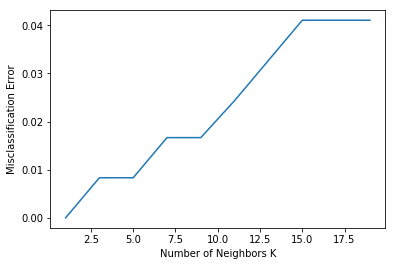

In [482]:
plt.plot(neighbors, error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [483]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [484]:
iris = pd.read_csv("iris.csv")

In [485]:
#Check the dataset
iris.info()
iris.fillna(value=iris.median(),inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [486]:
x= iris.drop('Species', axis=1)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [487]:
y= iris.pop('Species')

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

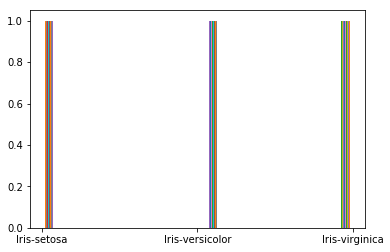

In [488]:
plt.hist(y);

In [489]:
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5           1.40           0.2
1      2            4.9           3.0           1.40           0.2
2      3            4.7           3.2           1.30           0.2
3      4            4.6           3.1           1.50           0.2
4      5            5.0           3.6           1.40           0.2
5      6            5.4           3.9           1.70           0.4
6      7            4.6           3.4           1.40           0.3
7      8            5.0           3.4           1.50           0.2
8      9            4.4           2.9           1.40           0.2
9     10            4.9           3.1           1.50           0.1
10    11            5.4           3.7           1.50           0.2
11    12            4.8           3.4           1.60           0.2
12    13            4.8           3.0           1.40           0.1
13    14            4.3           3.0           1.10          

In [490]:
#Drop Id variable from data
x.drop(columns='Id', inplace=True)

In [491]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### Question 12 
Find Correlation among all variables and give your insights 

In [492]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [493]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


PetalLengthCm and PetalWidthCm are having high correlation with 0.962757, so I'm removing PetalWidthCm

In [494]:
x.drop(columns='PetalWidthCm', inplace=True)

### Split data in Training and test set in 80:20.

In [495]:

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20)

### Question 13 
Do Feature Scaling 

In [496]:
# Use StandardScaler or similar methods
StandardScaler(x)

StandardScaler(copy=     SepalLengthCm  SepalWidthCm  PetalLengthCm
0              5.1           3.5           1.40
1              4.9           3.0           1.40
2              4.7           3.2           1.30
3              4.6           3.1           1.50
4              5.0           3.6           1.40
5      ...          3.0           4.35
151            5.8           3.0           4.35

[152 rows x 3 columns],
        with_mean=True, with_std=True)

### Question 14 
Train and Fit NaiveBayes Model

In [497]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
classfier= GaussianNB()
classfier.fit(x_train, y_train)

GaussianNB(priors=None)

In [498]:
#Predict
y_pred= classfier.predict(x_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [499]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0  8  2]
 [ 0  1  7]]


In [500]:
# show accuracy
print(accuracy_score(y_test, y_pred))

0.9032258064516129


In [501]:
#Show precision and Recall metrics

In [502]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.78      0.88      0.82         8

    avg / total       0.91      0.90      0.90        31



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [503]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [504]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [505]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [506]:
# use from sklearn.svm import SVC

In [507]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [508]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [509]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [510]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 